
Manifold Learning methods on a severed sphere

An application of the different :ref:`manifold` techniques
on a spherical data-set. Here one can see the use of
dimensionality reduction in order to gain some intuition
regarding the manifold learning methods. Regarding the dataset,
the poles are cut from the sphere, as well as a thin slice down its
side. This enables the manifold learning techniques to
'spread it open' whilst projecting it onto two dimensions.

For a similar example, where the methods are applied to the
S-curve dataset, see :ref:`sphx_glr_auto_examples_manifold_plot_compare_methods.py`

Note that the purpose of the :ref:`MDS <multidimensional_scaling>` is
to find a low-dimensional representation of the data (here 2D) in
which the distances respect well the distances in the original
high-dimensional space, unlike other manifold-learning algorithms,
it does not seeks an isotropic representation of the data in
the low-dimensional space. Here the manifold problem matches fai

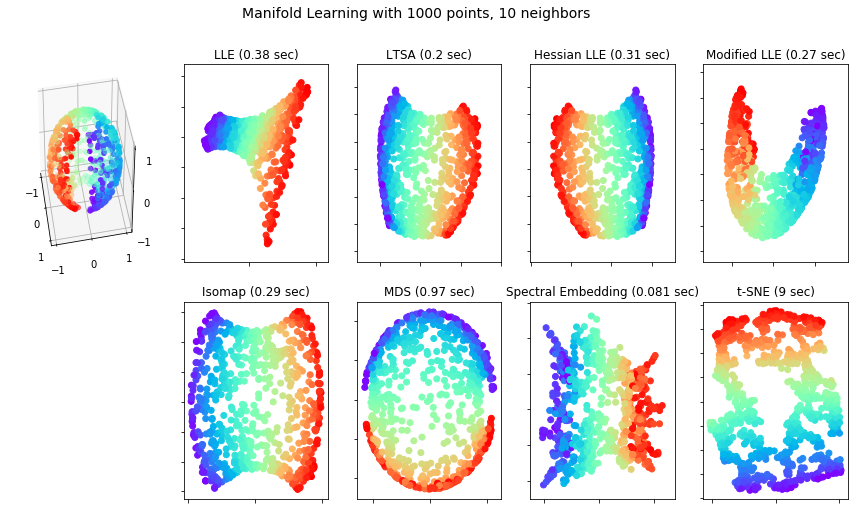

In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

"""
=============================================
Manifold Learning methods on a severed sphere
=============================================

An application of the different :ref:`manifold` techniques
on a spherical data-set. Here one can see the use of
dimensionality reduction in order to gain some intuition
regarding the manifold learning methods. Regarding the dataset,
the poles are cut from the sphere, as well as a thin slice down its
side. This enables the manifold learning techniques to
'spread it open' whilst projecting it onto two dimensions.

For a similar example, where the methods are applied to the
S-curve dataset, see :ref:`sphx_glr_auto_examples_manifold_plot_compare_methods.py`

Note that the purpose of the :ref:`MDS <multidimensional_scaling>` is
to find a low-dimensional representation of the data (here 2D) in
which the distances respect well the distances in the original
high-dimensional space, unlike other manifold-learning algorithms,
it does not seeks an isotropic representation of the data in
the low-dimensional space. Here the manifold problem matches fairly
that of representing a flat map of the Earth, as with
`map projection <https://en.wikipedia.org/wiki/Map_projection>`_
"""

# Author: Jaques Grobler <jaques.grobler@inria.fr>
# License: BSD 3 clause

print(__doc__)

from time import time

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.utils import check_random_state

# Next line to silence pyflakes.
Axes3D

# Variables for manifold learning.
n_neighbors = 10
n_samples = 1000

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])

# Plot our dataset.
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

ax = fig.add_subplot(251, projection='3d')
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

# Perform Locally Linear Embedding Manifold learning
methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    trans_data = manifold\
        .LocallyLinearEmbedding(n_neighbors, 2,
                                method=method).fit_transform(sphere_data).T
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

# Perform Isomap Manifold learning.
t0 = time()
trans_data = manifold.Isomap(n_neighbors, n_components=2)\
    .fit_transform(sphere_data).T
t1 = time()
print("%s: %.2g sec" % ('ISO', t1 - t0))

ax = fig.add_subplot(257)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("%s (%.2g sec)" % ('Isomap', t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Perform Multi-dimensional scaling.
t0 = time()
mds = manifold.MDS(2, max_iter=100, n_init=1)
trans_data = mds.fit_transform(sphere_data).T
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(258)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Perform Spectral Embedding.
t0 = time()
se = manifold.SpectralEmbedding(n_components=2,
                                n_neighbors=n_neighbors)
trans_data = se.fit_transform(sphere_data).T
t1 = time()
print("Spectral Embedding: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(259)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("Spectral Embedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Perform t-distributed stochastic neighbor embedding.
t0 = time()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
trans_data = tsne.fit_transform(sphere_data).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(2, 5, 10)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()


In [48]:
"""
=========================================
 Comparison of Manifold Learning methods
=========================================

An illustration of dimensionality reduction on the S-curve dataset
with various manifold learning methods.

For a discussion and comparison of these algorithms, see the
:ref:`manifold module page <manifold>`

For a similar example, where the methods are applied to a
sphere dataset, see :ref:`sphx_glr_auto_examples_manifold_plot_manifold_sphere.py`

Note that the purpose of the MDS is to find a low-dimensional
representation of the data (here 2D) in which the distances respect well
the distances in the original high-dimensional space, unlike other
manifold-learning algorithms, it does not seeks an isotropic
representation of the data in the low-dimensional space.
"""

# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

print (np.shape(X))

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# methods = ['standard', 'ltsa', 'hessian', 'modified']
# labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

# for i, method in enumerate(methods):
#     t0 = time()
#     Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
#                                         eigen_solver='auto',
#                                         method=method).fit_transform(X)
#     t1 = time()
#     print("%s: %.2g sec" % (methods[i], t1 - t0))

#     ax = fig.add_subplot(252 + i)
#     plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
#     plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
#     ax.xaxis.set_major_formatter(NullFormatter())
#     ax.yaxis.set_major_formatter(NullFormatter())
#     plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

## add autoencoder
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
# this is 
encoding_dim1 = 3
encoding_dim2 = 2  # 64 feature -> 2  the size of our encoded representations
decoding_dim3 = 3

####### Deep autoencoder #############
input_img = Input(shape=(decoding_dim3,))
encoded = Dense(encoding_dim1, activation='relu')(input_img)
encoded = Dense(encoding_dim3, activation='relu')(encoded)
decoded = Dense(decoding_dim3, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

###### Compile and Training
autoencoder.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', metrics = ['mae'])

autoencoder.fit(X, X,
                epochs=200,
                batch_size=20,
                shuffle=True,
                validation_split=0.1)

################ Separate Encoder Model for Reconstruction Evaluation ##############
encoder = Model(input_img, encoded) # automatically take everything it needed

############ Visualize the reconstructed inputs
# encode and decode some digits, note that we take them from the *test* set
t0 = time()
Y = encoder.predict(X)
t1 = time()
print("AutoEncoder: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 11)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("AutoEncoder (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()


# # plot history
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='test')
plt.legend()
plt.show()
# loss
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()



 Comparison of Manifold Learning methods

An illustration of dimensionality reduction on the S-curve dataset
with various manifold learning methods.

For a discussion and comparison of these algorithms, see the
:ref:`manifold module page <manifold>`

For a similar example, where the methods are applied to a
sphere dataset, see :ref:`sphx_glr_auto_examples_manifold_plot_manifold_sphere.py`

Note that the purpose of the MDS is to find a low-dimensional
representation of the data (here 2D) in which the distances respect well
the distances in the original high-dimensional space, unlike other
manifold-learning algorithms, it does not seeks an isotropic
representation of the data in the low-dimensional space.

(1000, 3)
Isomap: 0.39 sec
MDS: 1.2 sec
SpectralEmbedding: 0.089 sec
t-SNE: 14 sec


RuntimeError: Graph disconnected: cannot obtain value for tensor Tensor("input_33:0", shape=(?, 64), dtype=float32) at layer "input_33". The following previous layers were accessed without issue: []


Manifold learning on handwritten digits: Locally Linear Embedding, Isomap...

An illustration of various embeddings on the digits dataset.

The RandomTreesEmbedding, from the :mod:`sklearn.ensemble` module, is not
technically a manifold embedding method, as it learn a high-dimensional
representation on which we apply a dimensionality reduction method.
However, it is often useful to cast a dataset into a representation in
which the classes are linearly-separable.

t-SNE will be initialized with the embedding that is generated by PCA in
this example, which is not the default setting. It ensures global stability
of the embedding, i.e., the embedding does not depend on random
initialization.

1083 64
Computing random projection
Computing PCA projection
Computing Linear Discriminant Analysis projection
Computing Isomap embedding
Done.
Computing LLE embedding
Done. Reconstruction error: 1.63545e-06
Computing modified LLE embedding
Done. Reconstruction error: 0.336732
Computing Hessian LLE e

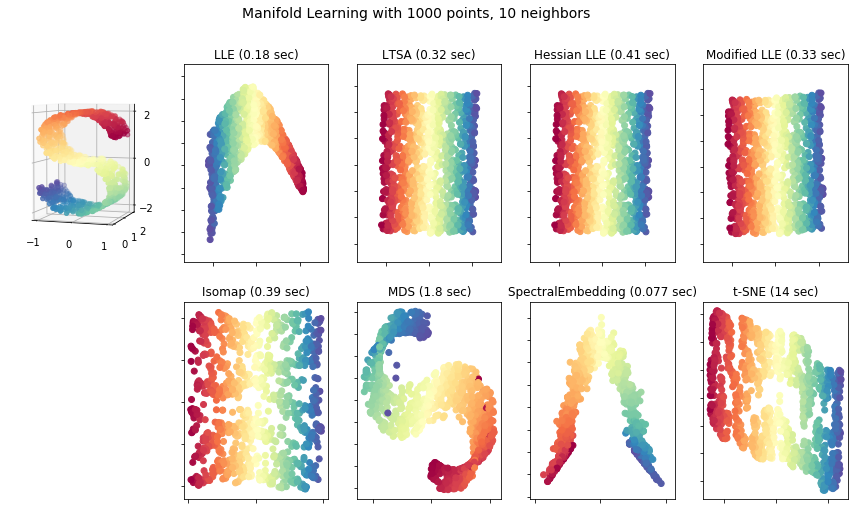

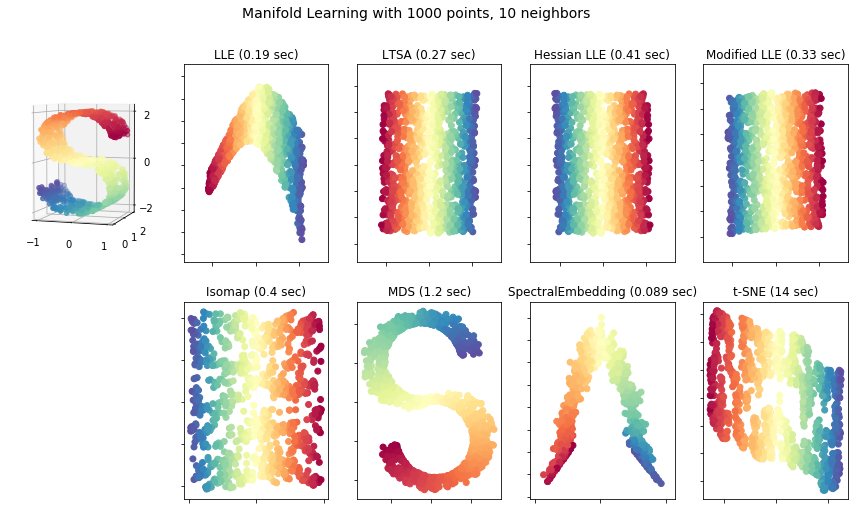

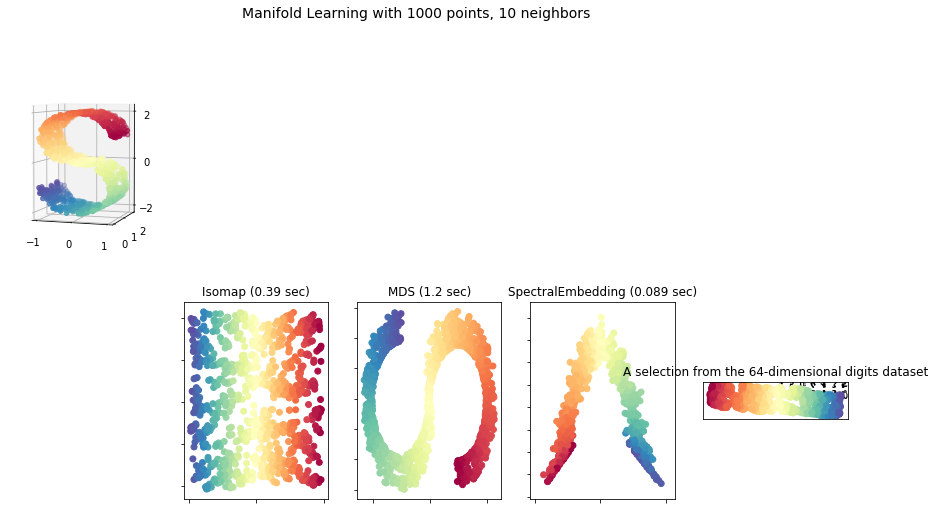

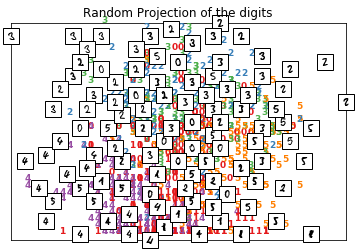

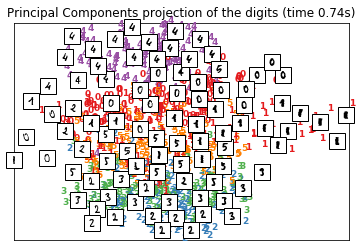

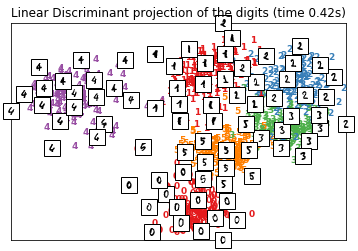

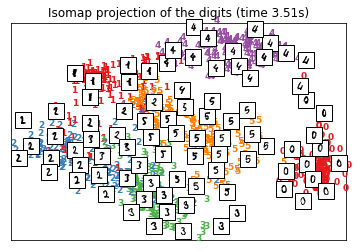

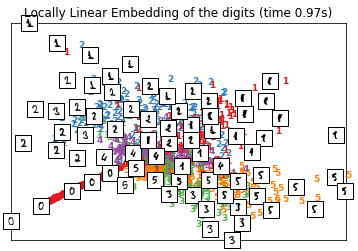

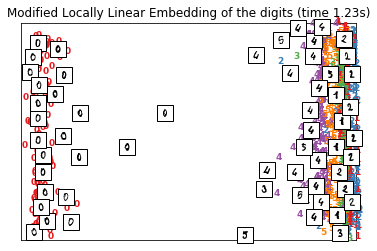

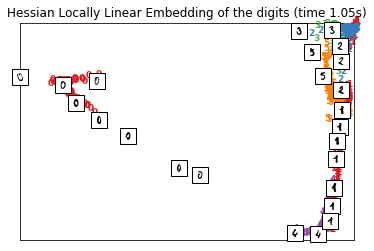

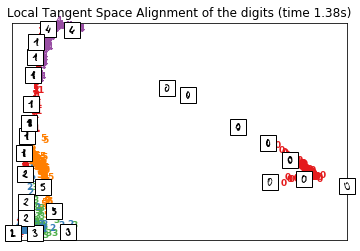

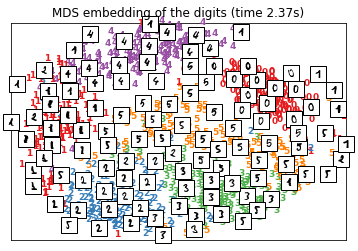

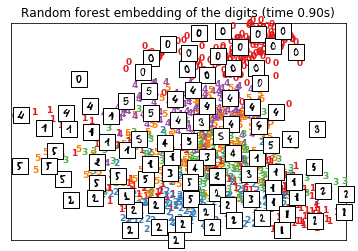

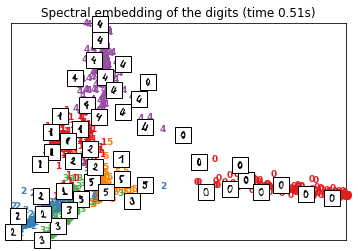

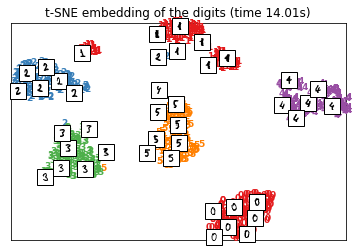

In [51]:
"""
=============================================================================
Manifold learning on handwritten digits: Locally Linear Embedding, Isomap...
=============================================================================

An illustration of various embeddings on the digits dataset.

The RandomTreesEmbedding, from the :mod:`sklearn.ensemble` module, is not
technically a manifold embedding method, as it learn a high-dimensional
representation on which we apply a dimensionality reduction method.
However, it is often useful to cast a dataset into a representation in
which the classes are linearly-separable.

t-SNE will be initialized with the embedding that is generated by PCA in
this example, which is not the default setting. It ensures global stability
of the embedding, i.e., the embedding does not depend on random
initialization.
"""

# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30
print(n_samples, n_features)

#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')


#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")


#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Projection on to the first 2 linear discriminant components

print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
plot_embedding(X_lda,
               "Linear Discriminant projection of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle,
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle,
               "Modified Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# HLLE embedding of the digits dataset
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='hessian')
t0 = time()
X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_hlle,
               "Hessian Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa,
               "Local Tangent Space Alignment of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced,
               "Random forest embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
# tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()


n_sample:  1083 n_feature 64
Train on 974 samples, validate on 109 samples
Epoch 1/200
974/974 [==============================] - 7s - loss: 54.9823 - mean_squared_error: 54.9823 - val_loss: 56.2369 - val_mean_squared_error: 56.2369
Epoch 2/200
974/974 [==============================] - 0s - loss: 53.4047 - mean_squared_error: 53.4047 - val_loss: 54.6009 - val_mean_squared_error: 54.6009
Epoch 3/200
974/974 [==============================] - 0s - loss: 52.3527 - mean_squared_error: 52.3527 - val_loss: 53.8646 - val_mean_squared_error: 53.8646
Epoch 4/200
974/974 [==============================] - 0s - loss: 51.7316 - mean_squared_error: 51.7316 - val_loss: 53.3806 - val_mean_squared_error: 53.3806
Epoch 5/200
974/974 [==============================] - 0s - loss: 51.3042 - mean_squared_error: 51.3042 - val_loss: 52.9649 - val_mean_squared_error: 52.9649
Epoch 6/200
974/974 [==============================] - 0s - loss: 50.9795 - mean_squared_error: 50.9795 - val_loss: 52.8681 - val_mean_

974/974 [==============================] - 0s - loss: 50.8829 - mean_squared_error: 50.8829 - val_loss: 52.8074 - val_mean_squared_error: 52.8074
Epoch 53/200
974/974 [==============================] - 0s - loss: 50.8825 - mean_squared_error: 50.8825 - val_loss: 52.8072 - val_mean_squared_error: 52.8072
Epoch 54/200
974/974 [==============================] - 0s - loss: 50.8824 - mean_squared_error: 50.8824 - val_loss: 52.8062 - val_mean_squared_error: 52.8062
Epoch 55/200
974/974 [==============================] - 0s - loss: 50.8822 - mean_squared_error: 50.8822 - val_loss: 52.8064 - val_mean_squared_error: 52.8064
Epoch 56/200
974/974 [==============================] - 0s - loss: 50.8820 - mean_squared_error: 50.8820 - val_loss: 52.8072 - val_mean_squared_error: 52.8072
Epoch 57/200
974/974 [==============================] - 0s - loss: 50.8817 - mean_squared_error: 50.8817 - val_loss: 52.8060 - val_mean_squared_error: 52.8060
Epoch 58/200
974/974 [==============================] - 0s 

974/974 [==============================] - 0s - loss: 50.8714 - mean_squared_error: 50.8714 - val_loss: 52.7997 - val_mean_squared_error: 52.7997
Epoch 104/200
974/974 [==============================] - 0s - loss: 50.8712 - mean_squared_error: 50.8712 - val_loss: 52.7997 - val_mean_squared_error: 52.7997
Epoch 105/200
974/974 [==============================] - 0s - loss: 50.8712 - mean_squared_error: 50.8712 - val_loss: 52.8001 - val_mean_squared_error: 52.8001
Epoch 106/200
974/974 [==============================] - 0s - loss: 50.8710 - mean_squared_error: 50.8710 - val_loss: 52.7993 - val_mean_squared_error: 52.7993
Epoch 107/200
974/974 [==============================] - 0s - loss: 50.8709 - mean_squared_error: 50.8709 - val_loss: 52.7996 - val_mean_squared_error: 52.7996
Epoch 108/200
974/974 [==============================] - 0s - loss: 50.8707 - mean_squared_error: 50.8707 - val_loss: 52.7993 - val_mean_squared_error: 52.7993
Epoch 109/200
974/974 [==============================]

974/974 [==============================] - 0s - loss: 50.8664 - mean_squared_error: 50.8664 - val_loss: 52.7960 - val_mean_squared_error: 52.7960
Epoch 155/200
974/974 [==============================] - 0s - loss: 50.8663 - mean_squared_error: 50.8663 - val_loss: 52.7934 - val_mean_squared_error: 52.7934
Epoch 156/200
974/974 [==============================] - 0s - loss: 50.8663 - mean_squared_error: 50.8663 - val_loss: 52.7942 - val_mean_squared_error: 52.7942
Epoch 157/200
974/974 [==============================] - 0s - loss: 50.8662 - mean_squared_error: 50.8662 - val_loss: 52.7996 - val_mean_squared_error: 52.7996
Epoch 158/200
974/974 [==============================] - 0s - loss: 50.8661 - mean_squared_error: 50.8661 - val_loss: 52.7972 - val_mean_squared_error: 52.7972
Epoch 159/200
974/974 [==============================] - 0s - loss: 50.8661 - mean_squared_error: 50.8661 - val_loss: 52.7963 - val_mean_squared_error: 52.7963
Epoch 160/200
974/974 [==============================]

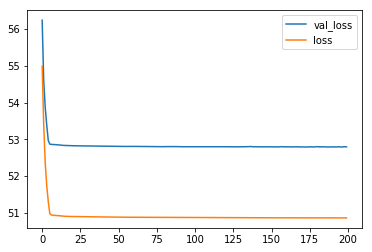

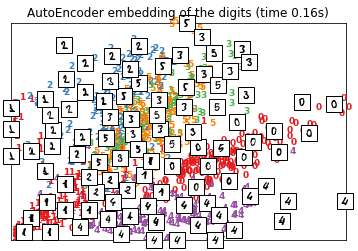

In [52]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import metrics
import numpy as np

# this is the size of our encoded representations
encoding_dim = 2

############ AutoEncoder Model ##########################
# this is our input placeholder
print("n_sample: ",n_samples, "n_feature", n_features)

input_img = Input(shape=(n_features,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(n_features, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

################ Separate Encoder Model for Reconstruction Evaluation ##############
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

###### Compile and Training
autoencoder.compile(optimizer='rmsprop', 
              loss='mse',
                    metrics=[metrics.mse])

history = autoencoder.fit(X, X,
                epochs=200,
                batch_size=20,
                shuffle=True,
                validation_split=0.1)
# # plot history
# plt.plot(history.history['mean_absolute_error'], label='train')
# plt.plot(history.history['val_mean_absolute_error'], label='test')
# plt.legend()
# plt.show()
# loss
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

t0 = time()
encoded_imgs = encoder.predict(X)
plot_embedding(encoded_imgs,
               "AutoEncoder embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

n_sample:  1083 n_feature 64
(1083, 2)


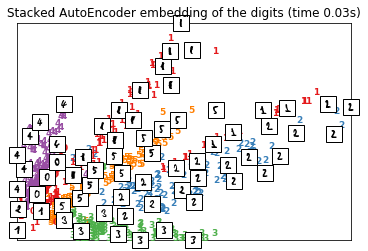

In [44]:
print("n_sample: ",n_samples, "n_feature", n_features)
t0 = time()
x = encoder.predict(X)
print(x.shape)
# import math
# x_new = []
# for i in range(len(x)):
#     if np.isfinite(x[i][0]) and np.isfinite(x[i][1]):
#         x_new.append(x[i])
# print(np.shape(x), np.shape(x_new))
plot_embedding(x[0:800,:],
               "Stacked AutoEncoder embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

In [50]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
# this is the size of our encoded representations
encoding_dim1 = 32
encoding_dim2 = 16
encoding_dim3 = 2  # 64 feature -> 2
decoding_dim1 = 16
decoding_dim2 = 32
decoding_dim3 = 64

####### Deep autoencoder #############
input_img = Input(shape=(decoding_dim3,))
encoded = Dense(encoding_dim1, activation='relu')(input_img)
encoded = Dense(encoding_dim2, activation='relu')(encoded)
encoded = Dense(encoding_dim3, activation='relu')(encoded)

decoded = Dense(decoding_dim1, activation='relu')(encoded)
decoded = Dense(decoding_dim2, activation='relu')(decoded)
decoded = Dense(decoding_dim3, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

###### Compile and Training
autoencoder.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', metrics = ['mse'])

history = autoencoder.fit(X, X,
                epochs=1000,
                batch_size=20,
                shuffle=True,
                validation_split=0.1)

################ Separate Encoder Model for Reconstruction Evaluation ##############
encoder = Model(input_img, encoded) # automatically take everything it needed

############ Visualize the reconstructed inputs
# encode and decode some digits, note that we take them from the *test* set
encoded_imgs = encoder.predict(X)
# # plot history
plt.plot(history.history['mean_squared_error'], label='train')
plt.plot(history.history['val_mean_squared_error'], label='test')
plt.legend()
plt.show()
# loss
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

t0 = time()
encoded_imgs = encoder.predict(X)
plot_embedding(encoded_imgs,
               "Stacked AutoEncoder embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

ValueError: Error when checking input: expected input_38 to have shape (None, 64) but got array with shape (1000, 3)